# Part II - (Ford GoBike System Data)
## by (John Kwame Dunyo)


## Investigation Overview


For the presentation, I focus on trip duration and trip count. I start by finding the relationship between user characteristics & trip count by presenting different type of visualization (Histogram, Pie Chart & Bar Plot). Then I found the relation between trip duration and user characteristics like (member age & user type).




## Dataset Overview

The dataset used in this project is from the Ford GoBike Systems. It includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("./201902-fordgobike-tripdata_CLEANED.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.




> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Ride Distribution By User Type

There are 2 users, Subcribers and Customers. The number of trips of Subscriber users is more than the number of trips of Customer users. About 163,544 of the total trips representing 89.2.% was taken by Subscriber whereas 10.8% of the trips taken by the customer type.


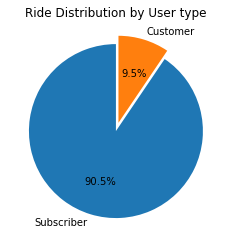

In [11]:
user_type = df['user_type'].value_counts()
plt.pie(user_type, labels = ['Subscriber','Customer',], autopct='%1.1f%%', startangle = 90,explode =(0 , 0.1));
plt.title('Ride Distribution by User type');

## Ride Distribution by Gender

Male dominates predominantly with 74.6% of the total trips. Females took 23.3% and the rest being other gender

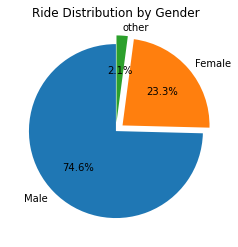

In [12]:
gender_cnt = df['member_gender'].value_counts()

plt.pie(gender_cnt, labels = ['Male','Female','other'], autopct='%1.1f%%', startangle = 90,explode =(0 , 0.1, 0.1));
plt.title('Ride Distribution by Gender');

## Ride Distribution By Age

The most bike trips are for members between 25-55 years old , and the number of trips gradually decreases as the age increases.

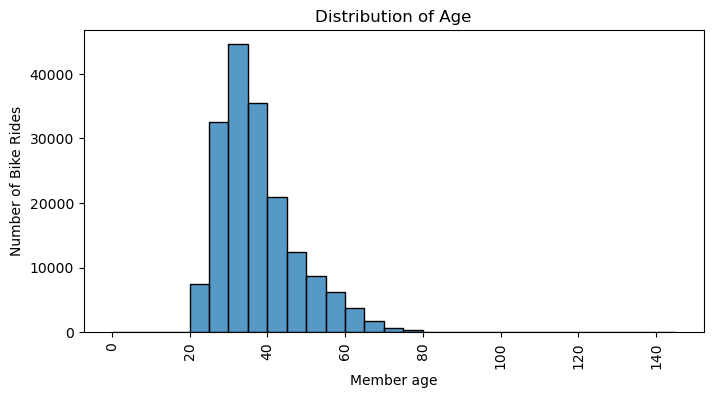

In [13]:
# Distribution of Age
plt.figure(figsize = (8,4), dpi = 100)

bins = np.arange(0, df['member_age'].max()+5, 5)
sb.histplot(data=df, x='member_age', color=sb.color_palette()[0], bins = bins)
plt.xticks(rotation=90)
plt.xlabel('Member age')
plt.ylabel('Number of Bike Rides')

plt.title("Distribution of Age")

plt.show();

## Ride duration per Weekdays

There is a stable bike use along weekdays 5 to 10 minutes. However, the trip duration is longer during weekends, reflecting more casual usages.ie 5 to 15 minutes

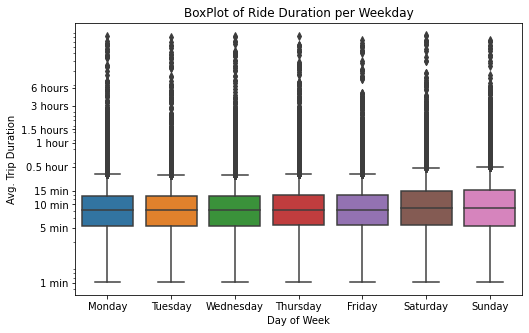

In [14]:
plt.figure(figsize=(8,5))
plt.title('BoxPlot of Ride Duration per Weekday')
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.boxplot(data = df, x = "start_dayofweek", y = "duration_sec", order=order)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration')
plt.yticks(tick_locs, tick_names)
plt.show();

## Ride Duration Comapared to User Type

Subscribers tend to have less average ride times compared to normal customers. This may mean that most of the subscribers are using the system to comute to and from work/school, with the same round trip time everyday.

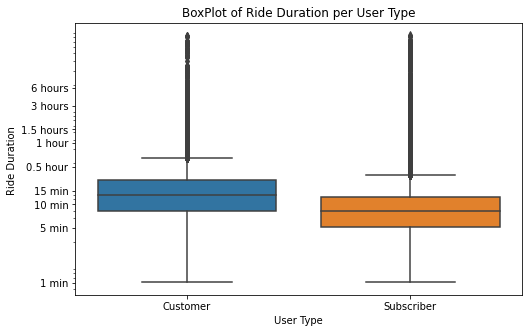

In [15]:
# clustered bar chart, 

plt.figure(figsize=(8,5))
sb.boxplot(x=df['user_type'], y=df['duration_sec'])
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of Ride Duration per User Type')
plt.ylabel('Ride Duration ')
plt.xlabel('User Type')
plt.yticks(tick_locs, tick_names);



## Hourly Usage during Weekdays for Customers and Subscribers

Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. whereas customers, on the other hand, tend to ride for fun in the afternoon or early evenings over weekends, with higher average rides. This may be for recreational and entertainment purposes

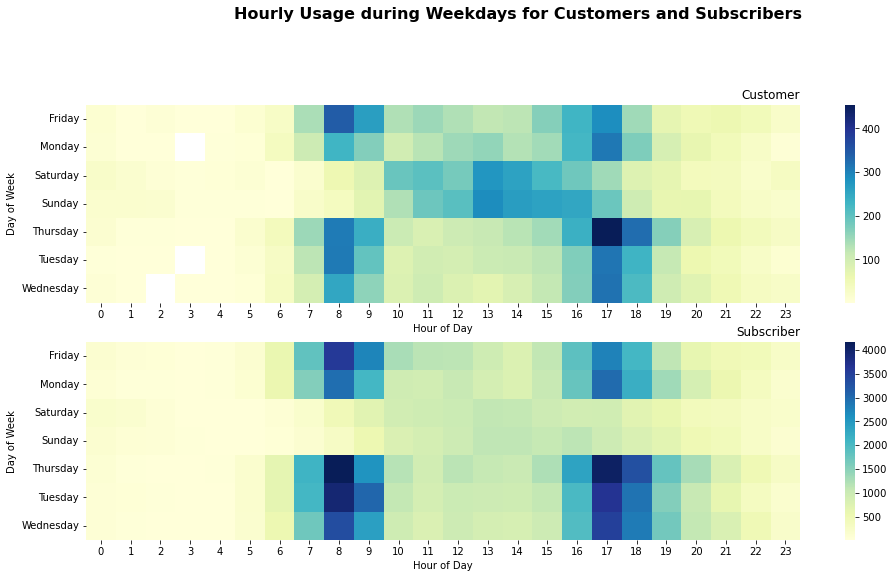

In [16]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');

plt.subplot(2, 1, 2);
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 